In [1]:
#import necessary libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('teleCust1000t.csv')

In [3]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001CA9E0B668>]],
      dtype=object)

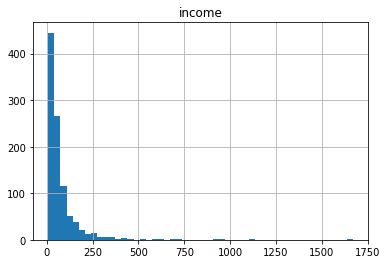

In [4]:
df.hist(column='income', bins=50)

## Define Feature Set

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

### Note:  
To use Sickit Learn Library Pandas dataframe has to be converted to numpy array

In [6]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values

In [7]:
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [8]:
y = df['custcat'].values

In [9]:
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data

### Note:
Data Standardization gives data zero mean and unit variance. This is a good practice especially for algorithms like KNN which are based on distance of cases

In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [11]:
X[0:2]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158]])

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print('train set:', X_train.shape, y_train.shape)
print('test set:', X_test.shape, y_test.shape)

train set: (800, 11) (800,)
test set: (200, 11) (200,)


## Classification

In [14]:
from sklearn.neighbors import KNeighborsClassifier

k=4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [15]:
y_predict = neigh.predict(X_test)
y_predict[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

## Accuracy Evaluation

In [17]:
from sklearn import metrics
print('train set accuracy: ', metrics.accuracy_score(y_train,neigh.predict(X_train)))
print('test set accuracy: ',metrics.accuracy_score(y_test, y_predict))

train set accuracy:  0.5475
test set accuracy:  0.32


# Build the model again with k=6

In [23]:
k=6
neigh6 = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

In [24]:
yhat = neigh6.predict(X_test)

In [25]:
print('train set accuracy: ', metrics.accuracy_score(y_train,neigh6.predict(X_train)))
print('test set accuracy: ',metrics.accuracy_score(y_test, yhat))

train set accuracy:  0.51625
test set accuracy:  0.31


# Find K which is best suited for the model

In [27]:
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

In [28]:
ConfusionMx = []

In [29]:
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    

In [30]:
mean_acc

array([0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31])

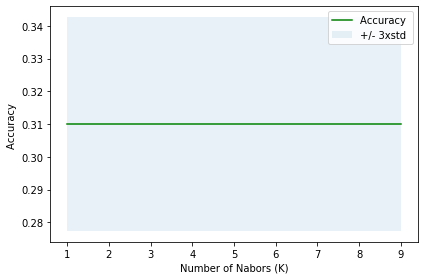

In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()